In [1]:
#Pacotes a serem habilitados
install.packages("magrittr")
install.packages("tm")
install.packages("wordcloud")

Installing package into ‘/home/matheus/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Installing package into ‘/home/matheus/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Installing package into ‘/home/matheus/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [2]:
library(magrittr)
library(tm) 
library(wordcloud)
library(cluster)
library(fpc)

Loading required package: NLP

Loading required package: RColorBrewer



In [3]:
# Definição do endereço do ambiente de trabalho
# setwd("~/home/matheus/pos-graduacao/pln/projeto")
covid <- readLines("./PM-COVID-4064-TM.txt")

In [4]:
coviddf <- read.delim("./PM-COVID-4064-TM.txt", header = FALSE, sep = "\n")

In [5]:
coviddf$doc_id <- seq.int(nrow(coviddf))

In [6]:
coviddf <- coviddf[c(2,1)]
colnames(coviddf) <- c("doc_id", "text")

In [7]:
covid_source <- VectorSource(covid)
coviddf_source <- DataframeSource(coviddf)

In [8]:
covid_corpus <- VCorpus(covid_source)
coviddf_corpus <- VCorpus(coviddf_source)

In [9]:
print(covid_corpus)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 3767


In [10]:
print(coviddf_corpus)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 2647


In [11]:
covid_corpus[[1]]

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 1648

In [12]:
covid_corpus[[1]]$content

[1] "The World Health Organization (WHO) has issued a warning that, although the 2019  novel coronavirus (COVID-19) from Wuhan City (China), is not pandemic, it should be  contained to prevent the global spread. The COVID-19 virus was known earlier as  2019-nCoV. As of 12 February 2020, WHO reported 45,171 cases and 1115 deaths related  to COVID-19. COVID-19 is similar to Severe Acute Respiratory Syndrome coronavirus  (SARS-CoV) virus in its pathogenicity, clinical spectrum, and epidemiology.  Comparison of the genome sequences of COVID-19, SARS-CoV, and Middle East  Respiratory Syndrome coronavirus (MERS-CoV) showed that COVID-19 has a better  sequence identity with SARS-CoV compared to MERS CoV. However, the amino acid  sequence of COVID-19 differs from other coronaviruses specifically in the regions of  1ab polyprotein and surface glycoprotein or S-protein. Although several animals have  been speculated to be a reservoir for COVID-19, no animal reservoir has been already  confirmed. COVID-19 causes COVID-19 disease that has similar symptoms as SARS-CoV.  Studies suggest that the human receptor for COVID-19 may be angiotensin-converting  enzyme 2 (ACE2) receptor similar to that of SARS-CoV. The nucleocapsid (N) protein  of COVID-19 has nearly 90% amino acid sequence identity with SARS-CoV. The N protein  antibodies of SARS-CoV may cross react with COVID-19 but may not provide  cross-immunity. In a similar fashion to SARS-CoV, the N protein of COVID-19 may play  an important role in suppressing the RNA interference (RNAi) to overcome the host  defense. This mini-review aims at investigating the most recent trend of COVID-19."

In [13]:
tolower(covid_corpus[[1]]$content)
toupper(covid_corpus[[1]]$content)
removePunctuation(covid_corpus[[1]]$content)
removeNumbers(covid_corpus[[1]]$content)
stripWhitespace(covid_corpus[[1]]$content)

[1] "the world health organization (who) has issued a warning that, although the 2019  novel coronavirus (covid-19) from wuhan city (china), is not pandemic, it should be  contained to prevent the global spread. the covid-19 virus was known earlier as  2019-ncov. as of 12 february 2020, who reported 45,171 cases and 1115 deaths related  to covid-19. covid-19 is similar to severe acute respiratory syndrome coronavirus  (sars-cov) virus in its pathogenicity, clinical spectrum, and epidemiology.  comparison of the genome sequences of covid-19, sars-cov, and middle east  respiratory syndrome coronavirus (mers-cov) showed that covid-19 has a better  sequence identity with sars-cov compared to mers cov. however, the amino acid  sequence of covid-19 differs from other coronaviruses specifically in the regions of  1ab polyprotein and surface glycoprotein or s-protein. although several animals have  been speculated to be a reservoir for covid-19, no animal reservoir has been already  confirmed. covid-19 causes covid-19 disease that has similar symptoms as sars-cov.  studies suggest that the human receptor for covid-19 may be angiotensin-converting  enzyme 2 (ace2) receptor similar to that of sars-cov. the nucleocapsid (n) protein  of covid-19 has nearly 90% amino acid sequence identity with sars-cov. the n protein  antibodies of sars-cov may cross react with covid-19 but may not provide  cross-immunity. in a similar fashion to sars-cov, the n protein of covid-19 may play  an important role in suppressing the rna interference (rnai) to overcome the host  defense. this mini-review aims at investigating the most recent trend of covid-19."

[1] "THE WORLD HEALTH ORGANIZATION (WHO) HAS ISSUED A WARNING THAT, ALTHOUGH THE 2019  NOVEL CORONAVIRUS (COVID-19) FROM WUHAN CITY (CHINA), IS NOT PANDEMIC, IT SHOULD BE  CONTAINED TO PREVENT THE GLOBAL SPREAD. THE COVID-19 VIRUS WAS KNOWN EARLIER AS  2019-NCOV. AS OF 12 FEBRUARY 2020, WHO REPORTED 45,171 CASES AND 1115 DEATHS RELATED  TO COVID-19. COVID-19 IS SIMILAR TO SEVERE ACUTE RESPIRATORY SYNDROME CORONAVIRUS  (SARS-COV) VIRUS IN ITS PATHOGENICITY, CLINICAL SPECTRUM, AND EPIDEMIOLOGY.  COMPARISON OF THE GENOME SEQUENCES OF COVID-19, SARS-COV, AND MIDDLE EAST  RESPIRATORY SYNDROME CORONAVIRUS (MERS-COV) SHOWED THAT COVID-19 HAS A BETTER  SEQUENCE IDENTITY WITH SARS-COV COMPARED TO MERS COV. HOWEVER, THE AMINO ACID  SEQUENCE OF COVID-19 DIFFERS FROM OTHER CORONAVIRUSES SPECIFICALLY IN THE REGIONS OF  1AB POLYPROTEIN AND SURFACE GLYCOPROTEIN OR S-PROTEIN. ALTHOUGH SEVERAL ANIMALS HAVE  BEEN SPECULATED TO BE A RESERVOIR FOR COVID-19, NO ANIMAL RESERVOIR HAS BEEN ALREADY  CONFIRMED. COVID-19 CAUSES COVID-19 DISEASE THAT HAS SIMILAR SYMPTOMS AS SARS-COV.  STUDIES SUGGEST THAT THE HUMAN RECEPTOR FOR COVID-19 MAY BE ANGIOTENSIN-CONVERTING  ENZYME 2 (ACE2) RECEPTOR SIMILAR TO THAT OF SARS-COV. THE NUCLEOCAPSID (N) PROTEIN  OF COVID-19 HAS NEARLY 90% AMINO ACID SEQUENCE IDENTITY WITH SARS-COV. THE N PROTEIN  ANTIBODIES OF SARS-COV MAY CROSS REACT WITH COVID-19 BUT MAY NOT PROVIDE  CROSS-IMMUNITY. IN A SIMILAR FASHION TO SARS-COV, THE N PROTEIN OF COVID-19 MAY PLAY  AN IMPORTANT ROLE IN SUPPRESSING THE RNA INTERFERENCE (RNAI) TO OVERCOME THE HOST  DEFENSE. THIS MINI-REVIEW AIMS AT INVESTIGATING THE MOST RECENT TREND OF COVID-19."

[1] "The World Health Organization WHO has issued a warning that although the 2019  novel coronavirus COVID19 from Wuhan City China is not pandemic it should be  contained to prevent the global spread The COVID19 virus was known earlier as  2019nCoV As of 12 February 2020 WHO reported 45171 cases and 1115 deaths related  to COVID19 COVID19 is similar to Severe Acute Respiratory Syndrome coronavirus  SARSCoV virus in its pathogenicity clinical spectrum and epidemiology  Comparison of the genome sequences of COVID19 SARSCoV and Middle East  Respiratory Syndrome coronavirus MERSCoV showed that COVID19 has a better  sequence identity with SARSCoV compared to MERS CoV However the amino acid  sequence of COVID19 differs from other coronaviruses specifically in the regions of  1ab polyprotein and surface glycoprotein or Sprotein Although several animals have  been speculated to be a reservoir for COVID19 no animal reservoir has been already  confirmed COVID19 causes COVID19 disease that has similar symptoms as SARSCoV  Studies suggest that the human receptor for COVID19 may be angiotensinconverting  enzyme 2 ACE2 receptor similar to that of SARSCoV The nucleocapsid N protein  of COVID19 has nearly 90 amino acid sequence identity with SARSCoV The N protein  antibodies of SARSCoV may cross react with COVID19 but may not provide  crossimmunity In a similar fashion to SARSCoV the N protein of COVID19 may play  an important role in suppressing the RNA interference RNAi to overcome the host  defense This minireview aims at investigating the most recent trend of COVID19"

[1] "The World Health Organization (WHO) has issued a warning that, although the   novel coronavirus (COVID-) from Wuhan City (China), is not pandemic, it should be  contained to prevent the global spread. The COVID- virus was known earlier as  -nCoV. As of  February , WHO reported , cases and  deaths related  to COVID-. COVID- is similar to Severe Acute Respiratory Syndrome coronavirus  (SARS-CoV) virus in its pathogenicity, clinical spectrum, and epidemiology.  Comparison of the genome sequences of COVID-, SARS-CoV, and Middle East  Respiratory Syndrome coronavirus (MERS-CoV) showed that COVID- has a better  sequence identity with SARS-CoV compared to MERS CoV. However, the amino acid  sequence of COVID- differs from other coronaviruses specifically in the regions of  ab polyprotein and surface glycoprotein or S-protein. Although several animals have  been speculated to be a reservoir for COVID-, no animal reservoir has been already  confirmed. COVID- causes COVID- disease that has similar symptoms as SARS-CoV.  Studies suggest that the human receptor for COVID- may be angiotensin-converting  enzyme  (ACE) receptor similar to that of SARS-CoV. The nucleocapsid (N) protein  of COVID- has nearly % amino acid sequence identity with SARS-CoV. The N protein  antibodies of SARS-CoV may cross react with COVID- but may not provide  cross-immunity. In a similar fashion to SARS-CoV, the N protein of COVID- may play  an important role in suppressing the RNA interference (RNAi) to overcome the host  defense. This mini-review aims at investigating the most recent trend of COVID-."

[1] "The World Health Organization (WHO) has issued a warning that, although the 2019 novel coronavirus (COVID-19) from Wuhan City (China), is not pandemic, it should be contained to prevent the global spread. The COVID-19 virus was known earlier as 2019-nCoV. As of 12 February 2020, WHO reported 45,171 cases and 1115 deaths related to COVID-19. COVID-19 is similar to Severe Acute Respiratory Syndrome coronavirus (SARS-CoV) virus in its pathogenicity, clinical spectrum, and epidemiology. Comparison of the genome sequences of COVID-19, SARS-CoV, and Middle East Respiratory Syndrome coronavirus (MERS-CoV) showed that COVID-19 has a better sequence identity with SARS-CoV compared to MERS CoV. However, the amino acid sequence of COVID-19 differs from other coronaviruses specifically in the regions of 1ab polyprotein and surface glycoprotein or S-protein. Although several animals have been speculated to be a reservoir for COVID-19, no animal reservoir has been already confirmed. COVID-19 causes COVID-19 disease that has similar symptoms as SARS-CoV. Studies suggest that the human receptor for COVID-19 may be angiotensin-converting enzyme 2 (ACE2) receptor similar to that of SARS-CoV. The nucleocapsid (N) protein of COVID-19 has nearly 90% amino acid sequence identity with SARS-CoV. The N protein antibodies of SARS-CoV may cross react with COVID-19 but may not provide cross-immunity. In a similar fashion to SARS-CoV, the N protein of COVID-19 may play an important role in suppressing the RNA interference (RNAi) to overcome the host defense. This mini-review aims at investigating the most recent trend of COVID-19."

In [14]:
stopwords("en"); stopwords("pt"); stopwords("es")

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

[1] "de"           "a"            "o"            "que"          "e"           
  [6] "do"           "da"           "em"           "um"           "para"        
 [11] "com"          "não"          "uma"          "os"           "no"          
 [16] "se"           "na"           "por"          "mais"         "as"          
 [21] "dos"          "como"         "mas"          "ao"           "ele"         
 [26] "das"          "à"            "seu"          "sua"          "ou"          
 [31] "quando"       "muito"        "nos"          "já"           "eu"          
 [36] "também"       "só"           "pelo"         "pela"         "até"         
 [41] "isso"         "ela"          "entre"        "depois"       "sem"         
 [46] "mesmo"        "aos"          "seus"         "quem"         "nas"         
 [51] "me"           "esse"         "eles"         "você"         "essa"        
 [56] "num"          "nem"          "suas"         "meu"          "às"          
 [61] "minha"        "numa"         "pelos"        "elas"         "qual"        
 [66] "nós"          "lhe"          "deles"        "essas"        "esses"       
 [71] "pelas"        "este"         "dele"         "tu"           "te"          
 [76] "vocês"        "vos"          "lhes"         "meus"         "minhas"      
 [81] "teu"          "tua"          "teus"         "tuas"         "nosso"       
 [86] "nossa"        "nossos"       "nossas"       "dela"         "delas"       
 [91] "esta"         "estes"        "estas"        "aquele"       "aquela"      
 [96] "aqueles"      "aquelas"      "isto"         "aquilo"       "estou"       
[101] "está"         "estamos"      "estão"        "estive"       "esteve"      
[106] "estivemos"    "estiveram"    "estava"       "estávamos"    "estavam"     
[111] "estivera"     "estivéramos"  "esteja"       "estejamos"    "estejam"     
[116] "estivesse"    "estivéssemos" "estivessem"   "estiver"      "estivermos"  
[121] "estiverem"    "hei"          "há"           "havemos"      "hão"         
[126] "houve"        "houvemos"     "houveram"     "houvera"      "houvéramos"  
[131] "haja"         "hajamos"      "hajam"        "houvesse"     "houvéssemos" 
[136] "houvessem"    "houver"       "houvermos"    "houverem"     "houverei"    
[141] "houverá"      "houveremos"   "houverão"     "houveria"     "houveríamos" 
[146] "houveriam"    "sou"          "somos"        "são"          "era"         
[151] "éramos"       "eram"         "fui"          "foi"          "fomos"       
[156] "foram"        "fora"         "fôramos"      "seja"         "sejamos"     
[161] "sejam"        "fosse"        "fôssemos"     "fossem"       "for"         
[166] "formos"       "forem"        "serei"        "será"         "seremos"     
[171] "serão"        "seria"        "seríamos"     "seriam"       "tenho"       
[176] "tem"          "temos"        "tém"          "tinha"        "tínhamos"    
[181] "tinham"       "tive"         "teve"         "tivemos"      "tiveram"     
[186] "tivera"       "tivéramos"    "tenha"        "tenhamos"     "tenham"      
[191] "tivesse"      "tivéssemos"   "tivessem"     "tiver"        "tivermos"    
[196] "tiverem"      "terei"        "terá"         "teremos"      "terão"       
[201] "teria"        "teríamos"     "teriam"

[1] "de"           "la"           "que"          "el"           "en"          
  [6] "y"            "a"            "los"          "del"          "se"          
 [11] "las"          "por"          "un"           "para"         "con"         
 [16] "no"           "una"          "su"           "al"           "lo"          
 [21] "como"         "más"          "pero"         "sus"          "le"          
 [26] "ya"           "o"            "este"         "sí"           "porque"      
 [31] "esta"         "entre"        "cuando"       "muy"          "sin"         
 [36] "sobre"        "también"      "me"           "hasta"        "hay"         
 [41] "donde"        "quien"        "desde"        "todo"         "nos"         
 [46] "durante"      "todos"        "uno"          "les"          "ni"          
 [51] "contra"       "otros"        "ese"          "eso"          "ante"        
 [56] "ellos"        "e"            "esto"         "mí"           "antes"       
 [61] "algunos"      "qué"          "unos"         "yo"           "otro"        
 [66] "otras"        "otra"         "él"           "tanto"        "esa"         
 [71] "estos"        "mucho"        "quienes"      "nada"         "muchos"      
 [76] "cual"         "poco"         "ella"         "estar"        "estas"       
 [81] "algunas"      "algo"         "nosotros"     "mi"           "mis"         
 [86] "tú"           "te"           "ti"           "tu"           "tus"         
 [91] "ellas"        "nosotras"     "vosotros"     "vosotras"     "os"          
 [96] "mío"          "mía"          "míos"         "mías"         "tuyo"        
[101] "tuya"         "tuyos"        "tuyas"        "suyo"         "suya"        
[106] "suyos"        "suyas"        "nuestro"      "nuestra"      "nuestros"    
[111] "nuestras"     "vuestro"      "vuestra"      "vuestros"     "vuestras"    
[116] "esos"         "esas"         "estoy"        "estás"        "está"        
[121] "estamos"      "estáis"       "están"        "esté"         "estés"       
[126] "estemos"      "estéis"       "estén"        "estaré"       "estarás"     
[131] "estará"       "estaremos"    "estaréis"     "estarán"      "estaría"     
[136] "estarías"     "estaríamos"   "estaríais"    "estarían"     "estaba"      
[141] "estabas"      "estábamos"    "estabais"     "estaban"      "estuve"      
[146] "estuviste"    "estuvo"       "estuvimos"    "estuvisteis"  "estuvieron"  
[151] "estuviera"    "estuvieras"   "estuviéramos" "estuvierais"  "estuvieran"  
[156] "estuviese"    "estuvieses"   "estuviésemos" "estuvieseis"  "estuviesen"  
[161] "estando"      "estado"       "estada"       "estados"      "estadas"     
[166] "estad"        "he"           "has"          "ha"           "hemos"       
[171] "habéis"       "han"          "haya"         "hayas"        "hayamos"     
[176] "hayáis"       "hayan"        "habré"        "habrás"       "habrá"       
[181] "habremos"     "habréis"      "habrán"       "habría"       "habrías"     
[186] "habríamos"    "habríais"     "habrían"      "había"        "habías"      
[191] "habíamos"     "habíais"      "habían"       "hube"         "hubiste"     
[196] "hubo"         "hubimos"      "hubisteis"    "hubieron"     "hubiera"     
[201] "hubieras"     "hubiéramos"   "hubierais"    "hubieran"     "hubiese"     
[206] "hubieses"     "hubiésemos"   "hubieseis"    "hubiesen"     "habiendo"    
[211] "habido"       "habida"       "habidos"      "habidas"      "soy"         
[216] "eres"         "es"           "somos"        "sois"         "son"         
[221] "sea"          "seas"         "seamos"       "seáis"        "sean"        
[226] "seré"         "serás"        "será"         "seremos"      "seréis"      
[231] "serán"        "sería"        "serías"       "seríamos"     "seríais"     
[236] "serían"       "era"          "eras"         "éramos"       "erais"       
[241] "eran"         "fui"          "fuiste"       "fue"          "fuimos"      
[246] "fuisteis"     "fueron"    

In [15]:
removeWords(covid_corpus[[1]]$content, stopwords("en")) %>% stripWhitespace()
new_stops <- c("COVID", "the", "The", stopwords("en"))
removeWords(covid_corpus[[1]]$content, new_stops) %>% stripWhitespace()

[1] "The World Health Organization (WHO) issued warning , although 2019 novel coronavirus (COVID-19) Wuhan City (China), pandemic, contained prevent global spread. The COVID-19 virus known earlier 2019-nCoV. As 12 February 2020, WHO reported 45,171 cases 1115 deaths related COVID-19. COVID-19 similar Severe Acute Respiratory Syndrome coronavirus (SARS-CoV) virus pathogenicity, clinical spectrum, epidemiology. Comparison genome sequences COVID-19, SARS-CoV, Middle East Respiratory Syndrome coronavirus (MERS-CoV) showed COVID-19 better sequence identity SARS-CoV compared MERS CoV. However, amino acid sequence COVID-19 differs coronaviruses specifically regions 1ab polyprotein surface glycoprotein S-protein. Although several animals speculated reservoir COVID-19, animal reservoir already confirmed. COVID-19 causes COVID-19 disease similar symptoms SARS-CoV. Studies suggest human receptor COVID-19 may angiotensin-converting enzyme 2 (ACE2) receptor similar SARS-CoV. The nucleocapsid (N) protein COVID-19 nearly 90% amino acid sequence identity SARS-CoV. The N protein antibodies SARS-CoV may cross react COVID-19 may provide cross-immunity. In similar fashion SARS-CoV, N protein COVID-19 may play important role suppressing RNA interference (RNAi) overcome host defense. This mini-review aims investigating recent trend COVID-19."

[1] " World Health Organization (WHO) issued warning , although 2019 novel coronavirus (-19) Wuhan City (China), pandemic, contained prevent global spread. -19 virus known earlier 2019-nCoV. As 12 February 2020, WHO reported 45,171 cases 1115 deaths related -19. -19 similar Severe Acute Respiratory Syndrome coronavirus (SARS-CoV) virus pathogenicity, clinical spectrum, epidemiology. Comparison genome sequences -19, SARS-CoV, Middle East Respiratory Syndrome coronavirus (MERS-CoV) showed -19 better sequence identity SARS-CoV compared MERS CoV. However, amino acid sequence -19 differs coronaviruses specifically regions 1ab polyprotein surface glycoprotein S-protein. Although several animals speculated reservoir -19, animal reservoir already confirmed. -19 causes -19 disease similar symptoms SARS-CoV. Studies suggest human receptor -19 may angiotensin-converting enzyme 2 (ACE2) receptor similar SARS-CoV. nucleocapsid (N) protein -19 nearly 90% amino acid sequence identity SARS-CoV. N protein antibodies SARS-CoV may cross react -19 may provide cross-immunity. In similar fashion SARS-CoV, N protein -19 may play important role suppressing RNA interference (RNAi) overcome host defense. This mini-review aims investigating recent trend -19."

In [16]:
stem_doc <- stemDocument(c("computational", "computers", "computation"))
comp_dict <- c("computer")
stemCompletion(stem_doc, comp_dict)

ERROR: Error in loadNamespace(name): there is no package called ‘SnowballC’


In [17]:
covid_clean <- tm_map(covid_corpus, removeWords, words = c(new_stops))
covid_clean <- tm_map(covid_clean, removePunctuation)
covid_clean[[1]]$content
covid_clean <- tm_map(covid_clean, stripWhitespace)

[1] " World Health Organization WHO  issued  warning  although  2019  novel coronavirus 19  Wuhan City China   pandemic     contained  prevent  global spread  19 virus  known earlier   2019nCoV As  12 February 2020 WHO reported 45171 cases  1115 deaths related   19 19  similar  Severe Acute Respiratory Syndrome coronavirus  SARSCoV virus   pathogenicity clinical spectrum  epidemiology  Comparison   genome sequences  19 SARSCoV  Middle East  Respiratory Syndrome coronavirus MERSCoV showed  19   better  sequence identity  SARSCoV compared  MERS CoV However  amino acid  sequence  19 differs   coronaviruses specifically   regions   1ab polyprotein  surface glycoprotein  Sprotein Although several animals    speculated    reservoir  19  animal reservoir   already  confirmed 19 causes 19 disease   similar symptoms  SARSCoV  Studies suggest   human receptor  19 may  angiotensinconverting  enzyme 2 ACE2 receptor similar    SARSCoV  nucleocapsid N protein   19  nearly 90 amino acid sequence identity  SARSCoV  N protein  antibodies  SARSCoV may cross react  19  may  provide  crossimmunity In  similar fashion  SARSCoV  N protein  19 may play   important role  suppressing  RNA interference RNAi  overcome  host  defense This minireview aims  investigating   recent trend  19"

In [18]:
covid_dtm <- DocumentTermMatrix(covid_clean)
covid_dtm
covid_m1 <- as.matrix(covid_dtm)

<<DocumentTermMatrix (documents: 3767, terms: 23136)>>
Non-/sparse entries: 337733/86815579
Sparsity           : 100%
Maximal term length: 108
Weighting          : term frequency (tf)

In [19]:
covid_tdm <- TermDocumentMatrix(covid_clean)
covid_tdm
covid_m2 <- as.matrix(covid_tdm)

<<TermDocumentMatrix (terms: 23136, documents: 3767)>>
Non-/sparse entries: 337733/86815579
Sparsity           : 100%
Maximal term length: 108
Weighting          : term frequency (tf)

In [20]:
covid_m1[1:10, 1000:1010]
covid_m2[1000:1010, 1:10]

,201917,201919,201920,201920 coronavirus,20192020,2019associated,2019corona,2019coronavirus,2019ncov,2019ncovalso,2019ncovsarscov2
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,2,0,0
7,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0


,1,2,3,4,5,6,7,8,9,10
201917,0,0,0,0,0,0,0,0,0,0
201919,0,0,0,0,0,0,0,0,0,0
201920,0,0,0,0,0,0,0,0,0,0
201920 coronavirus,0,0,0,0,0,0,0,0,0,0
20192020,0,0,0,0,0,0,0,0,0,0
2019associated,0,0,0,0,0,0,0,0,0,0
2019corona,0,0,0,0,0,0,0,0,0,0
2019coronavirus,0,0,0,0,0,0,0,0,0,0
2019ncov,1,0,1,0,1,2,1,0,0,0
2019ncovalso,0,0,0,0,0,0,0,0,0,0


In [21]:
term_frequency_covid <- rowSums(covid_m2)
term_frequency_covid <- sort(term_frequency_covid, decreasing = TRUE)
head(term_frequency_covid, 100) 
term_frequency_covid[100:200]

patients   coronavirus       disease      sarscov2      pandemic 
         5031          4584          4466          4273          3331 
  respiratory        severe     infection      clinical        health 
         3306          2834          2667          2448          2373 
        acute        review      syndrome          2019     treatment 
         2302          2276          2239          2193          1981 
          may         virus          care           can          this 
         1879          1830          1624          1594          1571 
         risk       studies          also         viral         cases 
         1534          1493          1412          1342          1254 
      current     potential         novel      evidence     including 
         1245          1226          1194          1103          1081 
       caused    management         world        spread           use 
         1058          1045          1034          1022          1004 
 transmission          data        system      outbreak        global 
          973           972           961           950           940 
     symptoms         china           new        immune         drugs 
          938           920           919           905           901 
         will         human      diseases    associated          2020 
          872           869           868           863           858 
    available      reported    infections       however          well 
          851           831           808           804           776 
      provide    healthcare       results     mortality      response 
          774           765           758           755           748 
         high   therapeutic          used    literature        public 
          739           736           735           725           725 
    effective           due   development      research     countries 
          724           719           706           702           700 
         many          role          ace2      infected       control 
          695           688           679           679           678 
   strategies     antiviral         based       medical     worldwide 
          669           665           662           662           661 
      several          need     currently        trials       methods 
          656           652           649           644           638 
      effects      measures       present      possible         cells 
          633           633           633           629           615 
      therapy     different       patient     important coronaviruses 
          613           591           581           577           570 
    diagnosis     pneumonia       vaccine        number        impact 
          570           570           561           560           549

impact  cardiovascular          people        specific      mechanisms 
            549             547             536             534             522 
        rapidly         viruses            lung          recent           since 
            520             519             516             516             515 
     infectious      prevention            drug recommendations         various 
            502             502             500             498             498 
  complications        outcomes         factors      guidelines           first 
            495             493             489             484             483 
      increased         discuss         article           early        vaccines 
            481             478             476             476             476 
 manifestations        cytokine          cancer          injury           wuhan 
            475             474             472             471             469 
    significant         related         sarscov           among       emergency 
            467             466             465             464             459 
       december            sars             one           there            time 
            457             457             455             453             452 
       although     information       regarding            case           study 
            451             451             451             450             450 
          using           rapid        critical          future            host 
            446             443             438             436             436 
          known      identified      population            cell        epidemic 
            430             429             429             417             415 
      therefore    inflammatory         systems       therapies        diabetes 
            414             411             410             407             405 
         common      challenges           major   understanding          social 
            398             395             394             391             388 
       children      treatments        findings       knowledge      conditions 
            387             386             384             384             377 
       affected    neurological          deaths      diagnostic          safety 
            376             371             370             370             370 
          these             two      especially      procedures        receptor 
            367             367             366             365             365 
       severity        distress       confirmed             key       published 
            363             362             361             360             358 
           rate         include        emerging          highly         ongoing 
            358             357             356             354             354 
          still          higher      considered         limited         prevent 
            354             352             351             350             350 
          cause         reports            help        increase         support 
            347             346             344             343             343 
     protective 
            342

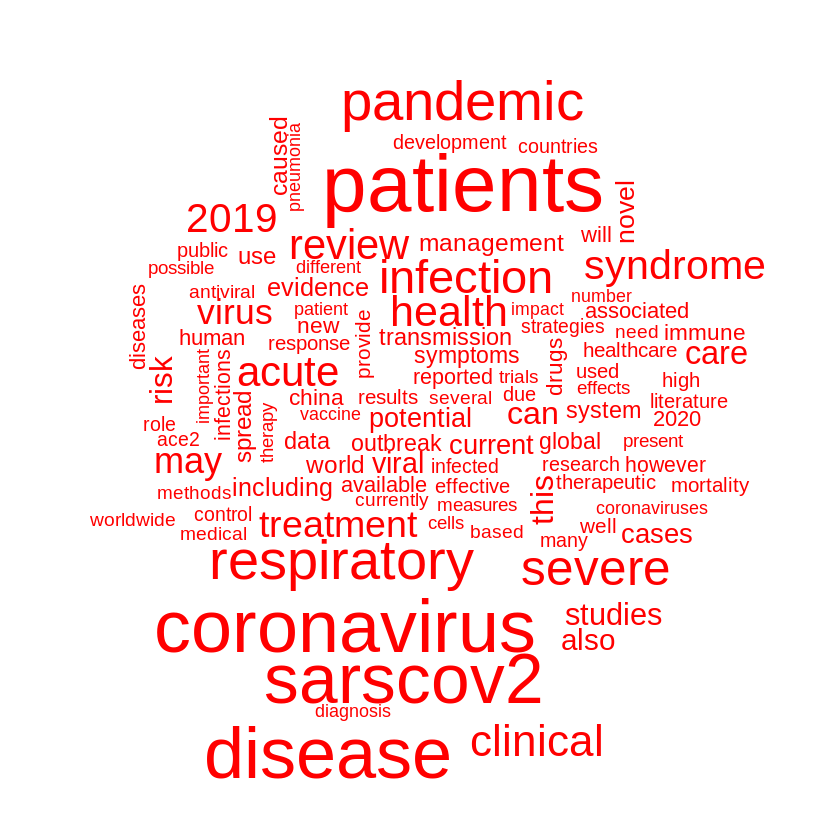

In [22]:
term <- names(term_frequency_covid)
num <- term_frequency_covid
word_freqs <- data.frame(term, num)
wordcloud(word_freqs$term, word_freqs$num, max.words = 100, colors = "red")

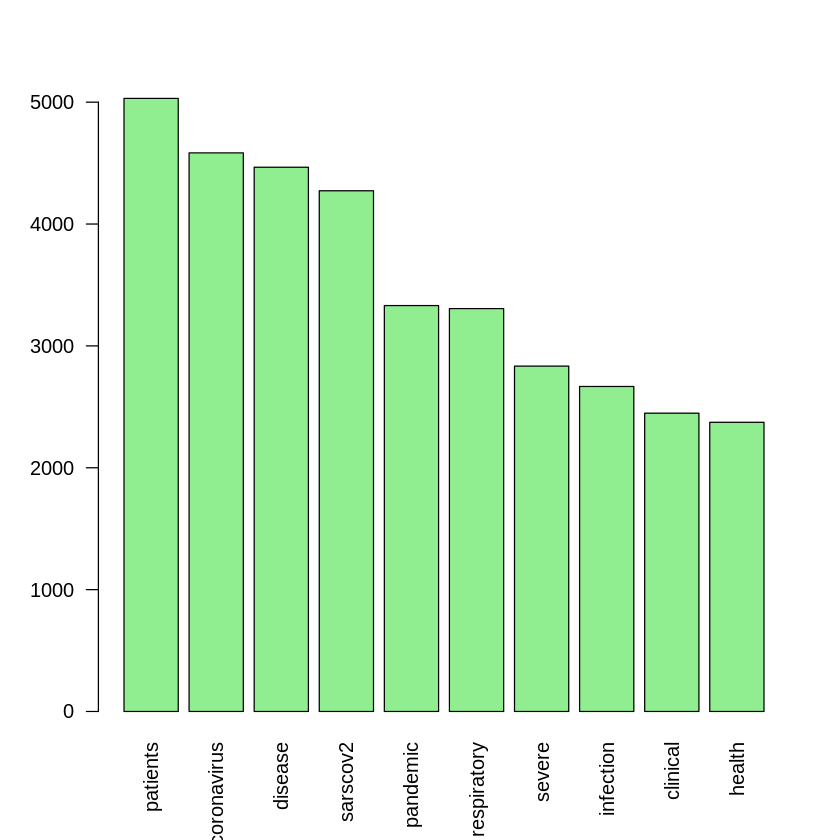

In [24]:
freq <- sort(colSums(as.matrix(covid_dtm)), decreasing=TRUE)   
barplot(freq[1:10],col="lightgreen",las=2)

<<DocumentTermMatrix (documents: 3767, terms: 35)>>
Non-/sparse entries: 46635/85210
Sparsity           : 65%
Maximal term length: 11
Weighting          : term frequency (tf)


Call:
hclust(d = d, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 35 


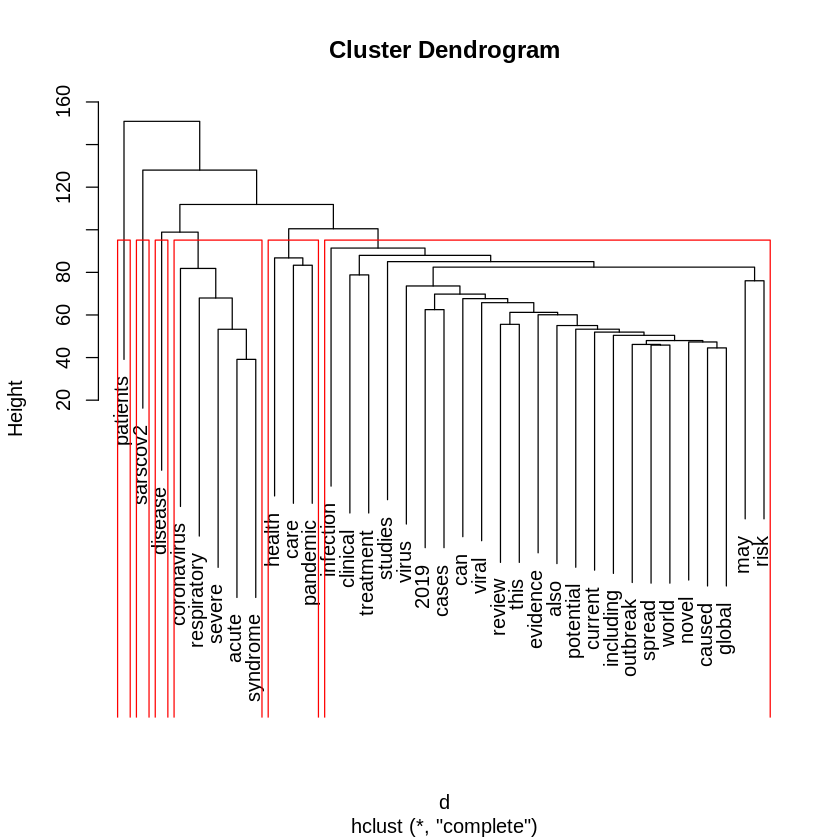

In [26]:
dtmss <- removeSparseTerms(covid_dtm, 0.80)   
dtmss   
d <- dist(t(dtmss), method="euclidian")   
fit <- hclust(d=d, method="complete")
fit 
plot(fit, hang=1) 
groups <- cutree(fit, k=6)   
rect.hclust(fit, k=6, border="red")

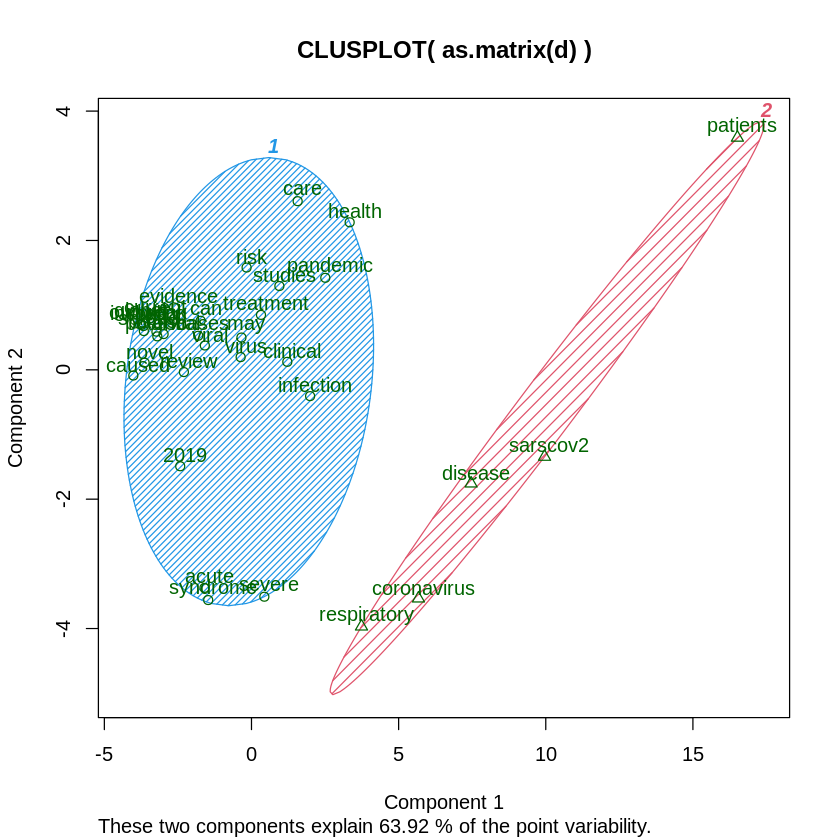

In [28]:
d <- dist(t(dtmss), method="euclidian")   
kfit <- kmeans(d, 2)   
clusplot(as.matrix(d), kfit$cluster, color=T, shade=T, labels=2, lines=0)

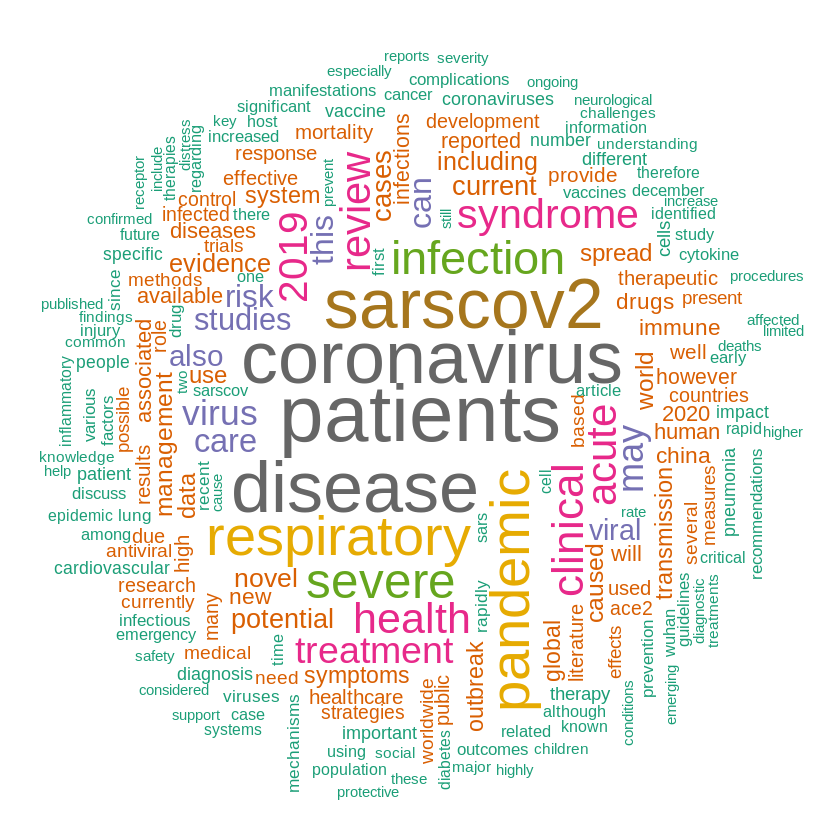

In [29]:
set.seed(1234)
wordcloud(words = word_freqs$term, freq = word_freqs$num, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))